<a href="https://colab.research.google.com/github/shalomben130/DL_assignment130/blob/main/DL_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


GRU

In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense
from tensorflow.keras.preprocessing import sequence

In [2]:
max_words = 5000
(xt,yt),(xte,yte)= imdb.load_data(num_words=max_words)

max_len =500
xt=sequence.pad_sequences(xt,maxlen=max_len)
xte=sequence.pad_sequences(xte,maxlen=max_len)

model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
epochs=5
model.fit(xt,yt,batch_size=batch_size,epochs=epochs)


Epoch 1/5
196/196 [==============================] - 49s 210ms/step - loss: 0.5123 - accuracy: 0.7366
Epoch 2/5
196/196 [==============================] - 24s 122ms/step - loss: 0.2765 - accuracy: 0.8879
Epoch 3/5
196/196 [==============================] - 21s 106ms/step - loss: 0.2250 - accuracy: 0.9134
Epoch 4/5
196/196 [==============================] - 11s 56ms/step - loss: 0.1724 - accuracy: 0.9357
Epoch 5/5
196/196 [==============================] - 11s 54ms/step - loss: 0.1345 - accuracy: 0.9513


In [5]:
#mse for regression prblm output only 1
#binary cross entropy for binary output only 2
#categorical cross entropy for multiple ourput more than 2
#activation - sigmoid relu tanh
#optimizer - stocasticgd gd adam

In [6]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 12ms/step - loss: 0.3253 - accuracy: 0.8888
accuracy: 0.888759970664978
loss: 0.32527121901512146


In [7]:
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 16s 81ms/step - loss: 0.1093 - accuracy: 0.9622
Epoch 2/5
196/196 [==============================] - 7s 37ms/step - loss: 0.0847 - accuracy: 0.9703
Epoch 3/5
196/196 [==============================] - 9s 46ms/step - loss: 0.0659 - accuracy: 0.9785
Epoch 4/5
196/196 [==============================] - 8s 39ms/step - loss: 0.0553 - accuracy: 0.9817
Epoch 5/5
196/196 [==============================] - 7s 36ms/step - loss: 0.0458 - accuracy: 0.9853


In [8]:
train_loss1 = history.history['loss']
train_acc1 = history.history['accuracy']
xc1=range(len(train_acc1))

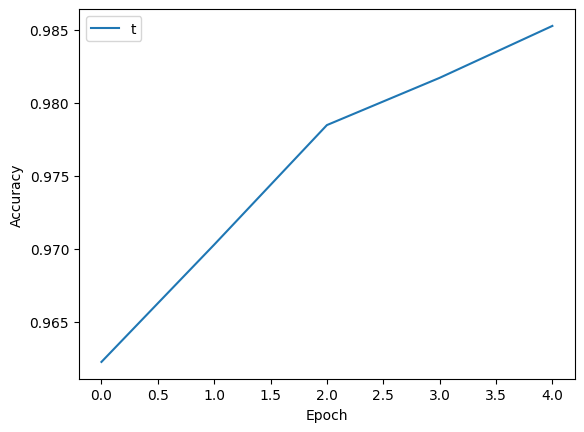

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc1, train_acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

LSTM


In [11]:
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [12]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(units=1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 5
batch_size = 128

hist=model.fit(xt, yt, epochs=epochs, batch_size=batch_size)

Epoch 1/5
196/196 [==============================] - 43s 205ms/step - loss: 0.4614 - accuracy: 0.7754
Epoch 2/5
196/196 [==============================] - 20s 103ms/step - loss: 0.2837 - accuracy: 0.8880
Epoch 3/5
196/196 [==============================] - 15s 78ms/step - loss: 0.2426 - accuracy: 0.9064
Epoch 4/5
196/196 [==============================] - 12s 62ms/step - loss: 0.2137 - accuracy: 0.9183
Epoch 5/5
196/196 [==============================] - 10s 52ms/step - loss: 0.1925 - accuracy: 0.9259


In [15]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3207 - accuracy: 0.8709
accuracy: 0.8709200024604797
loss: 0.3207443058490753


In [16]:
train_loss2 = hist.history['loss']
train_acc2 = hist.history['accuracy']
xc2=range(len(train_acc2))

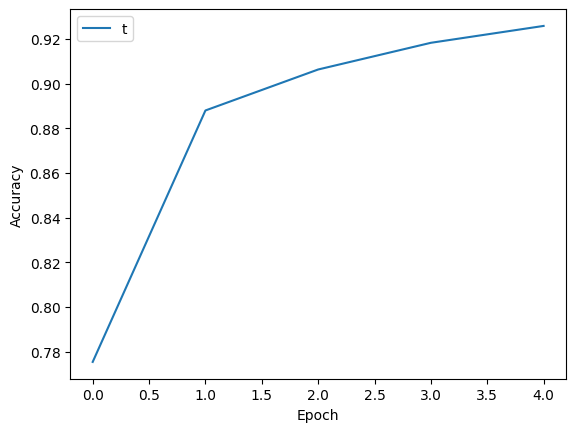

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc2, train_acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

In [18]:
# **RNN**

In [19]:
from tensorflow.keras.layers import Embedding,RNN
from keras import layers


In [20]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.add(Dense(units=1, activation='sigmoid'))

model = keras.Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

//The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

// The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
epochs = 5
batch_size = 128

h=model.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 31s 179ms/step - loss: 0.5533 - accuracy: 0.7071 - val_loss: 0.3754 - val_accuracy: 0.8314
Epoch 2/5
157/157 [==============================] - 19s 118ms/step - loss: 0.2856 - accuracy: 0.8801 - val_loss: 0.3350 - val_accuracy: 0.8594
Epoch 3/5
157/157 [==============================] - 14s 86ms/step - loss: 0.2268 - accuracy: 0.9112 - val_loss: 0.3019 - val_accuracy: 0.8732
Epoch 4/5
157/157 [==============================] - 13s 82ms/step - loss: 0.1735 - accuracy: 0.9335 - val_loss: 0.3688 - val_accuracy: 0.8704
Epoch 5/5
157/157 [==============================] - 10s 66ms/step - loss: 0.1426 - accuracy: 0.9484 - val_loss: 0.3897 - val_accuracy: 0.8622


In [23]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 14ms/step - loss: 0.3957 - accuracy: 0.8647
accuracy: 0.8647199869155884
loss: 0.3956715166568756


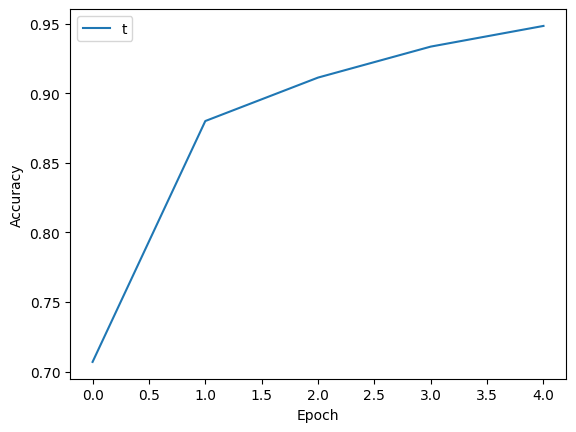

In [24]:
train_loss3 = h.history['loss']
train_acc3 = h.history['accuracy']
xc3=range(len(train_loss3))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

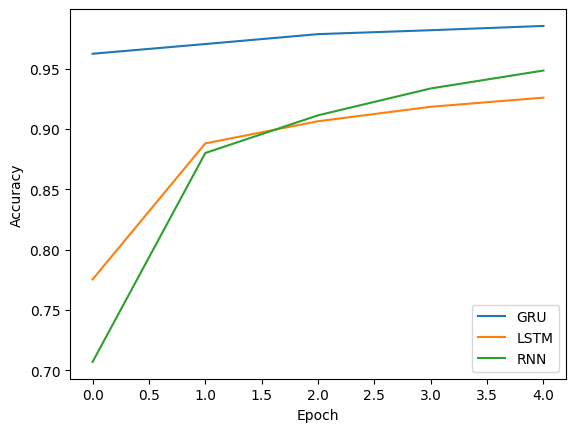

In [25]:
plt.plot(xc1, train_acc1)
plt.plot(xc2, train_acc2)
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["GRU","LSTM","RNN"])